In [1]:
from etvizLib.img_stuff import Jpg
import xarray as xr

In [2]:
j = Jpg()

In [3]:
def _xarray_return_numpy(file):
    ds = xr.open_rasterio(file)
    print(ds)
    v_array = ds.sel(band=1).values
    return (v_array)

In [4]:
file = 's3://dev-et-data/enduser/DelawareRiverBasin/drb150/2020/etasw_202001.tif'
arr = _xarray_return_numpy(file)
type(arr)

<xarray.DataArray (band: 1, y: 2139, x: 1966)>
[4205274 values with dtype=float64]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 38.36 38.36 38.37 38.37 38.37 ... 42.8 42.8 42.81 42.81
  * x        (x) float64 -76.79 -76.79 -76.78 -76.78 ... -72.71 -72.7 -72.7
Attributes:
    transform:           (0.002079945464631045, 0.0, -76.78971308248228, 0.0,...
    crs:                 +init=epsg:4326
    res:                 (0.002079945464631045, -0.0020800311583255384)
    is_tiled:            1
    nodatavals:          (nan,)
    scales:              (1.0,)
    offsets:             (0.0,)
    descriptions:        ('etasw_',)
    AREA_OR_POINT:       Area
    grid_mapping:        spatial_ref
    OVR_RESAMPLING_ALG:  NEAREST


numpy.ndarray

In [5]:
dir(arr)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [6]:
arr.view()

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [7]:
arr.shape

(2139, 1966)

In [8]:
arr[arr < 0] = 0

In [9]:
help (j.pl_create_jpg)

Help on method pl_create_jpg in module etvizLib.img_stuff:

pl_create_jpg(fname, array_name, cmap='prism', xlabel='xlabel', ylabel='ylabel', title='TITLE', subtitle='SubTitle', figsize=(6, 6)) method of etvizLib.img_stuff.Jpg instance
    creates a jpg file
    
    Parameters:
        fname:   the name of the output.jpg file
        array
        cmap
        xlabel
        ylabel
        title
        subtitle
        figsize



In [10]:
j.pl_create_jpg('a.jpg',arr,cmap='viridis',title='tony')

In [11]:
!ls

00-panel-simple.ipynb  55-make-jpgs-from-geotifs.ipynb	a.jpg  b.jpg


![](a.jpg)

In [12]:
ds = xr.open_rasterio(file)

In [13]:
da_masked = ds.where(ds>0.0)

RuntimeError: Can not put single artist in more than one figure

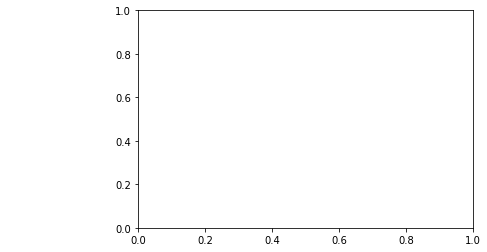

In [14]:
from matplotlib import pyplot as plt
fig=plt.figure
da_masked.plot(figure=fig)

In [ ]:
plt.savefig('b.jpg')

In [ ]:
dir(da_masked.plot())

In [15]:
help(da_masked.plot)

Help on _PlotMethods in module xarray.plot.plot object:

class _PlotMethods(builtins.object)
 |  _PlotMethods(darray)
 |  
 |  Default plot of DataArray using matplotlib.pyplot.
 |  
 |  Calls xarray plotting function based on the dimensions of
 |  darray.squeeze()
 |  
 |  =============== ===========================
 |  Dimensions      Plotting function
 |  --------------- ---------------------------
 |  1               :py:func:`xarray.plot.line`
 |  2               :py:func:`xarray.plot.pcolormesh`
 |  Anything else   :py:func:`xarray.plot.hist`
 |  =============== ===========================
 |  
 |  Parameters
 |  ----------
 |  darray : DataArray
 |  row : str, optional
 |      If passed, make row faceted plots on this dimension name
 |  col : str, optional
 |      If passed, make column faceted plots on this dimension name
 |  hue : str, optional
 |      If passed, make faceted line plots with hue on this dimension name
 |  col_wrap : int, optional
 |      Use together with ``co